In [109]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [110]:
dir = "p_date=2023-01-15-18_21_35"

In [111]:
path = f'../../output/weights/{dir}/log.json'
#path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

11001 records
dict_keys(['loss', 'mae', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [112]:
slice = 100_000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss) + 100000
loss_filtered = { k: v for k, v in enumerate(loss) if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [113]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 1_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.hlines(y=0, xmin=0, xmax=max(data.keys()), linewidth=2, color='purple')
    
    plt.title(title)
    
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    #print(f"Moving Average (simple): {moving_average}")
    print()
    #print(f"Moving Average: {percent_list}")
    print("Values: " + " > ".join(map(str, moving_average.values())))
    print()
    
    print(f"Minimum (last {interval}): {min(list(data.values())[:-interval])}")
    print(f"Average (last {interval}): {np.mean(list(data.values())[:-interval])}")
    print(f"Maximum (last {interval}): {max(list(data.values())[:-interval])}")

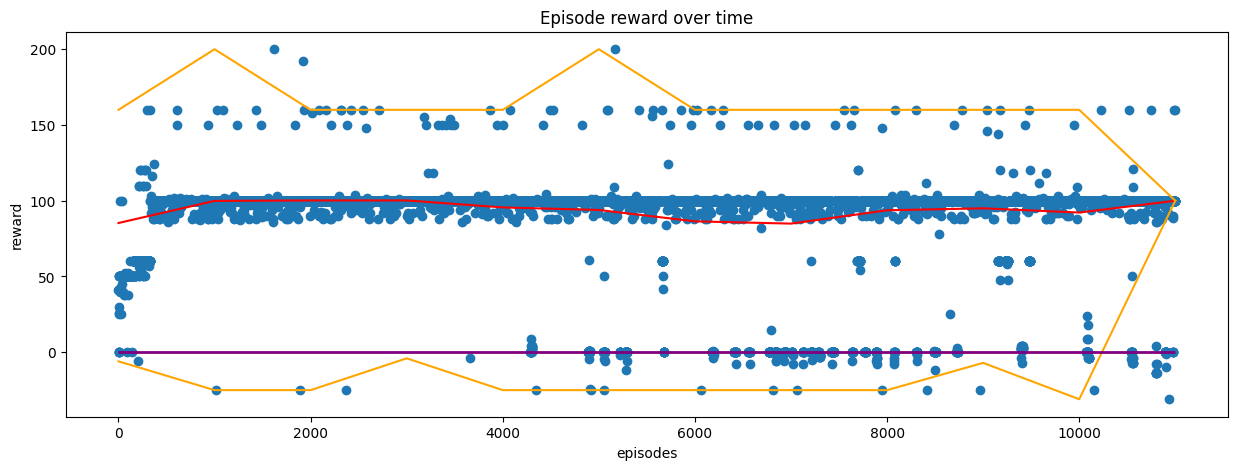

Maximum: 200.0
Average: 93.38736478501954

Values: 85.3 > 99.9 > 100.2 > 100.2 > 95.6 > 93.9 > 86.4 > 84.9 > 93.7 > 95.0 > 92.2 > 100.0

Minimum (last 1000): -25.0
Average (last 1000): 93.5054394560544
Maximum (last 1000): 200.0


In [114]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

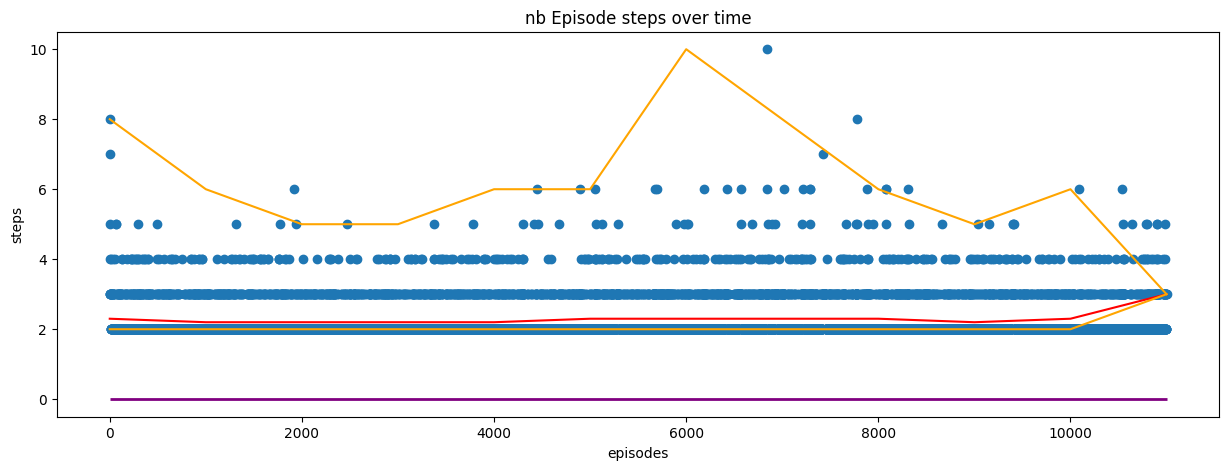

Maximum: 10
Average: 2.2578856467593855

Values: 2.3 > 2.2 > 2.2 > 2.2 > 2.2 > 2.3 > 2.3 > 2.3 > 2.3 > 2.2 > 2.3 > 3

Minimum (last 1000): 2
Average (last 1000): 2.2577742225777424
Maximum (last 1000): 10


In [115]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

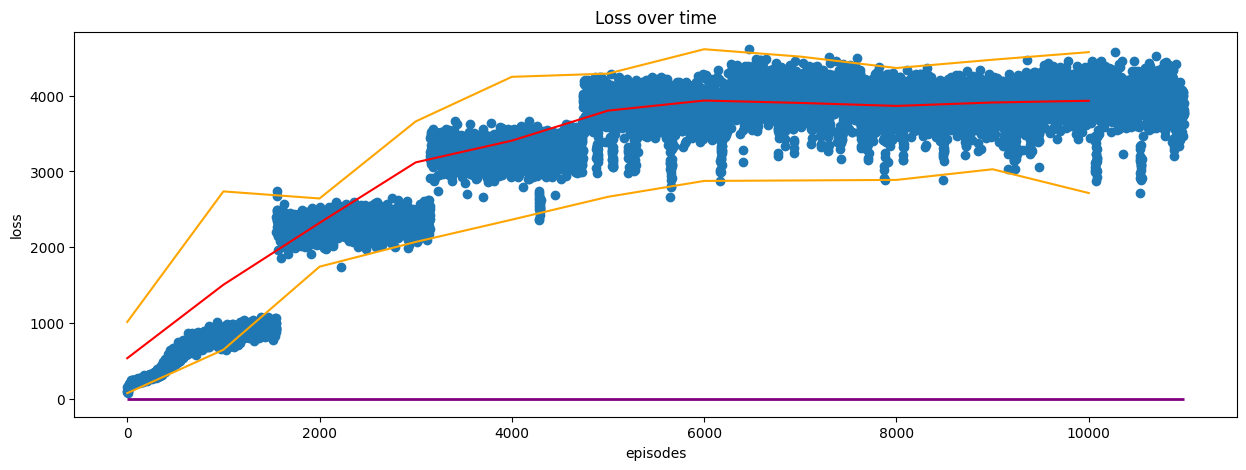

Maximum: 4609.951171875
Average: 3111.5971712559417

Values: 540.0 > 1507.9 > 2322.4 > 3119.6 > 3405.6 > 3801.2 > 3934.0 > 3902.5 > 3863.2 > 3908.3 > 3931.0

Minimum (last 1000): 80.21607208251953
Average (last 1000): 3029.6102161270032
Maximum (last 1000): 4609.951171875


In [116]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

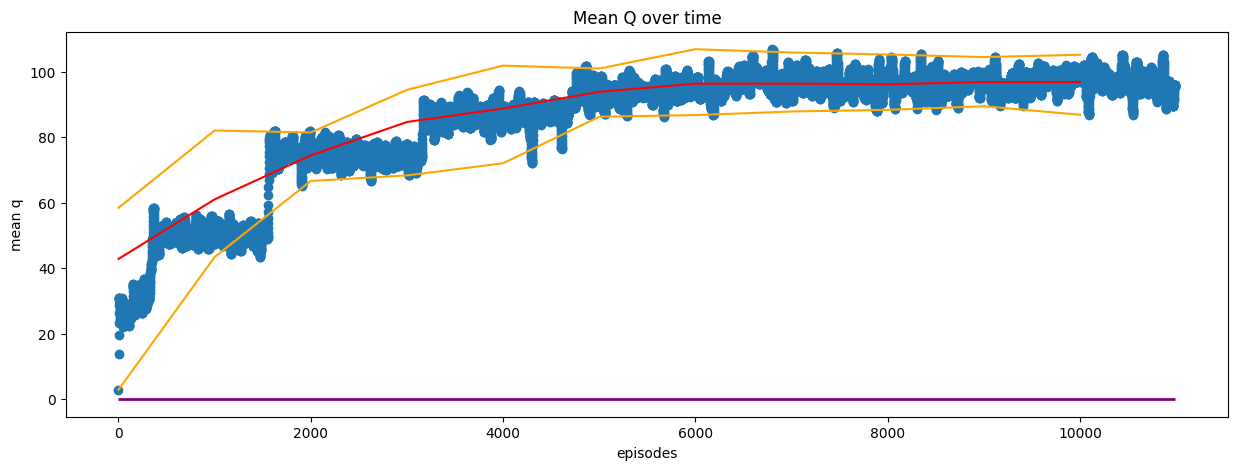

Maximum: 106.76677703857422
Average: 84.31435644338589

Values: 42.8 > 61.0 > 74.4 > 84.6 > 88.7 > 93.8 > 96.3 > 96.3 > 96.1 > 96.8 > 96.8

Minimum (last 1000): 2.930538942416509
Average (last 1000): 83.06325888622295
Maximum (last 1000): 106.76677703857422


In [117]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

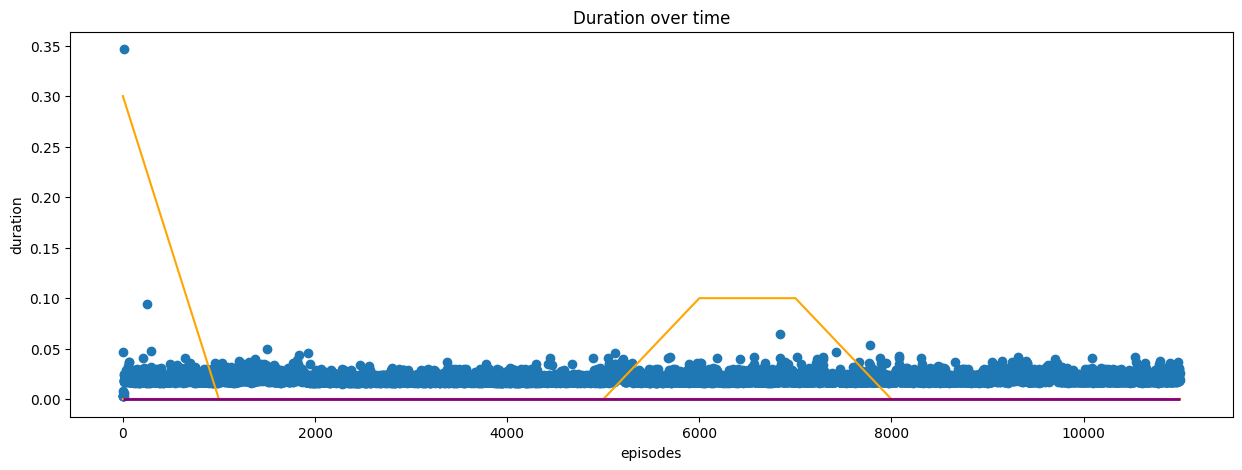

Maximum: 0.3463440000000002
Average: 0.019732775420416432

Values: 0.0 > 0.0 > 0.0 > 0.0 > 0.0 > 0.0 > 0.0 > 0.0 > 0.0 > 0.0 > 0.0 > 0.0

Minimum (last 1000): 0.0029245000000002186
Average (last 1000): 0.019746635816418487
Maximum (last 1000): 0.3463440000000002


In [118]:
plot(duration, "Duration over time", "episodes", "duration")